# Crop Recommendation System 🌾

<img src="Image.jpg" width=100% />

# Goal 🎯

<strong> The goal is to recommend the most suitable crops to grow in a particular farm based on various parameters and environmental statistics. </strong>

# Libraries 

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px ## Visualization
plt.style.use('ggplot')

from ipywidgets import interact

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
data = pd.read_csv("data.csv")
print(data.shape)
data.tail()

(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


## About Data

*  We have 2200 rows and 8 columns in the dataset
*  All values in the data are numberical except for the label data.


### Data fields

*  N - ratio of Nitrogen content in soil
*  P - ratio of Phosphorous content in soil
*  K - ratio of Potassium content in soil
*  temperature - temperature in degree Celsius
*  humidity - relative humidity in %
*  ph - ph value of the soil
*  rainfall - rainfall in mm

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
data['label'].value_counts()

cotton         100
orange         100
mothbeans      100
mungbean       100
rice           100
pigeonpeas     100
blackgram      100
banana         100
coffee         100
pomegranate    100
grapes         100
apple          100
chickpea       100
maize          100
lentil         100
jute           100
coconut        100
muskmelon      100
mango          100
watermelon     100
kidneybeans    100
papaya         100
Name: label, dtype: int64

In [8]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [10]:
print('Shape before deleting duplicate values:', data.shape)

# Removing duplicate rows if any

data.drop_duplicates(inplace=True)
print('Shape After deleting duplicate values:', data.shape)

Shape before deleting duplicate values: (2200, 8)
Shape After deleting duplicate values: (2200, 8)


# Visual Exploratory Data Analysis

<AxesSubplot:xlabel='label'>

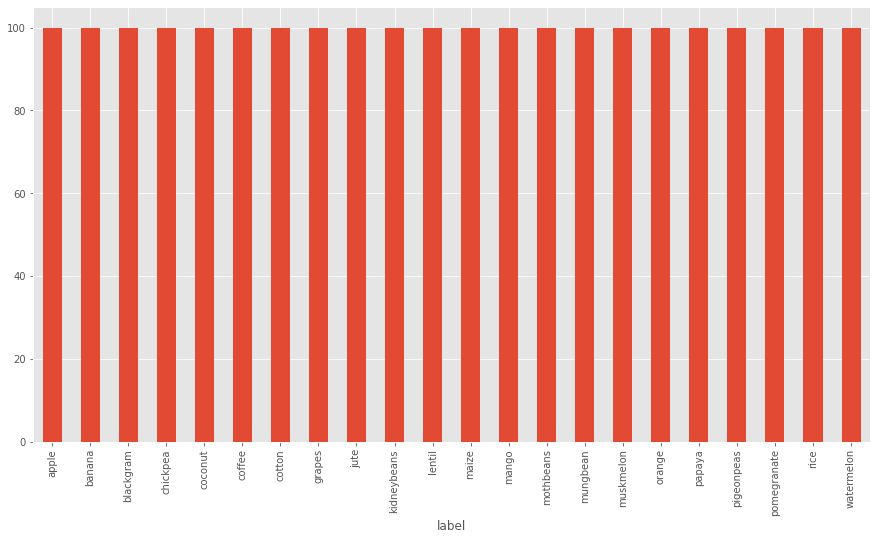

In [11]:
# Creating Bar chart as the Target variable is Categorical
GroupedData=data.groupby('label').size()
# px.bar(GroupedData , title="Number of rows per crop")


plt.figure(figsize=((15,8)))
GroupedData.plot.bar()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from. and data is balanced.

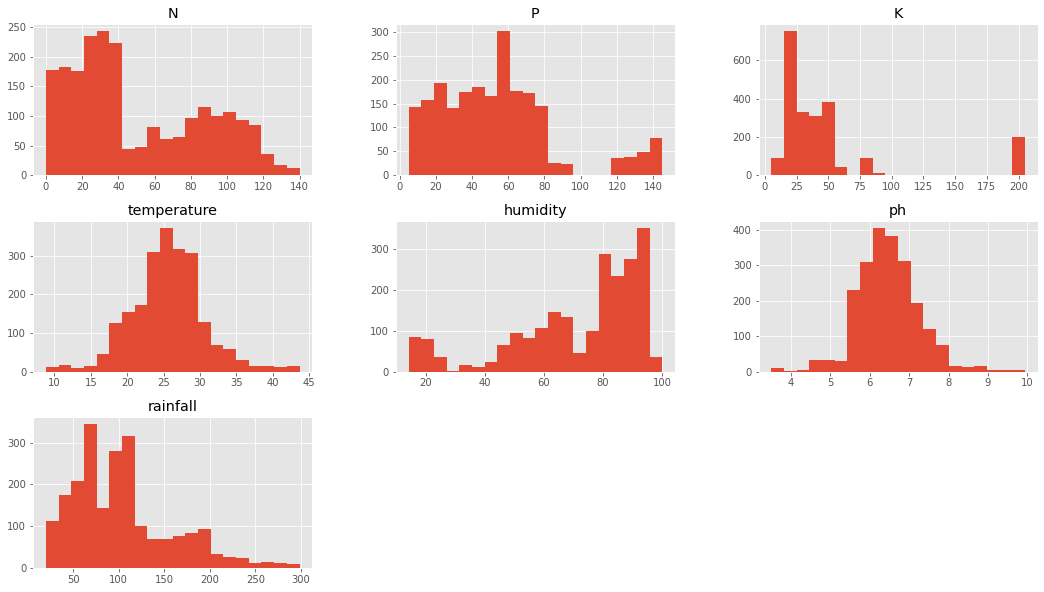

In [12]:
data.hist(['N' , 'P' , 'K' , 'temperature' , 'humidity' , 'ph' , 'rainfall'] ,bins=20, figsize=(18,10))

plt.show()

## Histogram Interpretation

*  Histograms shows us the data distribution for a single continuous variable.
<br>
<br>
*  The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "temperature", there are around 600 rows in data that has a temeperature between 25 to 30.
<br>
<br>
*  The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.
<br>
<br>
*  We can see there are rows having high P and K values. We will check if they are outliers or not.

In [13]:

data[['label','K']][data['K']>100].sort_values('K')

,label,K
1200,grapes,195
1257,grapes,195
1259,grapes,195
1264,grapes,195
1276,grapes,195
...,...,...
1263,grapes,205
1559,apple,205
1565,apple,205
1507,apple,205


In [14]:
data[['label','P']][data['P']>100].sort_values('P')

,label,P
1567,apple,120
1271,grapes,120
1531,apple,120
1257,grapes,120
1503,apple,120
...,...,...
1284,grapes,145
1220,grapes,145
1594,apple,145
1558,apple,145


#### Notice the same index range with same number of rows and labels are grapes and apple

In [15]:
high_PK = data[(data['P']>100) & (data['K']>100)]
high_PK

,N,P,K,temperature,humidity,ph,rainfall,label
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes
1202,22,123,205,32.445778,83.885049,5.896343,68.739325,grapes
1203,36,125,196,37.465668,80.659687,6.155261,66.838723,grapes
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,grapes
...,...,...,...,...,...,...,...,...
1595,40,120,197,23.805938,92.488795,5.889481,119.633555,apple
1596,25,132,198,22.319441,90.851744,5.732758,100.117344,apple
1597,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
1598,36,144,196,23.651676,94.505288,6.496934,115.361127,apple


In [16]:
high_PK['label'].unique()

array(['grapes', 'apple'], dtype=object)

It seems that grapes and apple needs high P and K ratio. Hence we will keep these rows 

In [17]:
# lets check the Summary Statistics for each of the Crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    
    
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('cotton', 'orange', 'mothbeans', 'mungbean', 'ric…

In [18]:
## Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    for crop in sorted(data['label'].unique()):
        print(f"{crop} : {data[(data['label'] == crop)][conditions].mean().round(2)}")

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

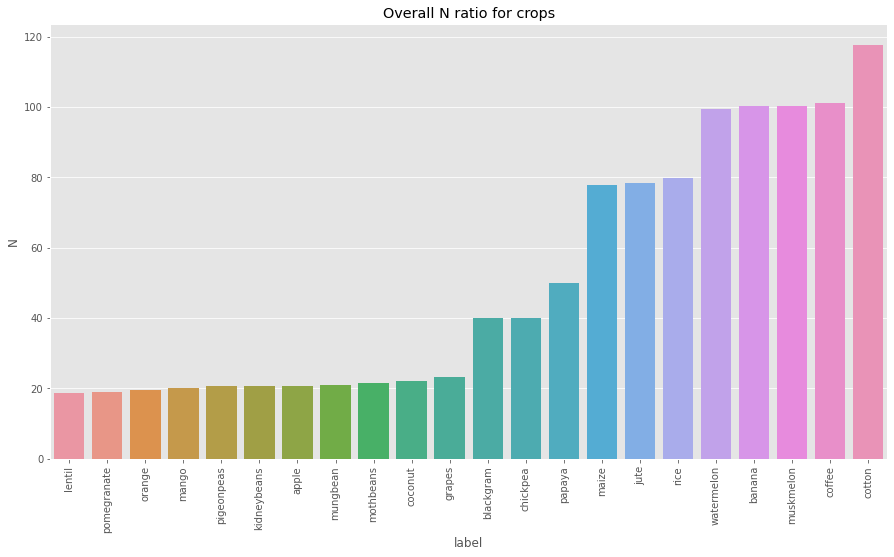

In [19]:
temp = data.groupby(by='label')['N'].mean().reset_index().sort_values('N')
# px.bar(temp, 'label', 'N' , title="Overall N ratio for crops")

plt.figure(figsize=((15,8)))
sns.barplot(data=temp,x="label" , y = "N" )
plt.title("Overall N ratio for crops")
plt.xticks(rotation = 90)
plt.show()

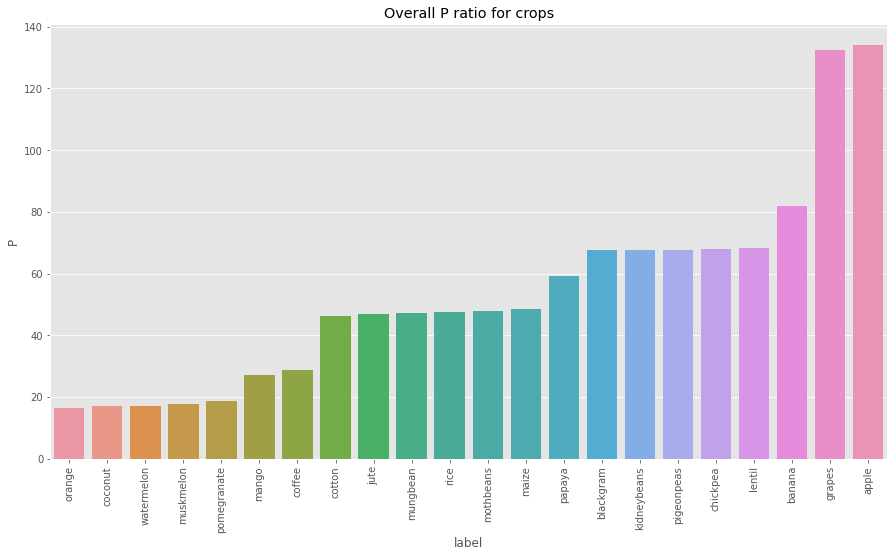

In [20]:
temp = data.groupby(by='label')['P'].mean().reset_index().sort_values('P')
# px.bar(temp, 'label', 'P' , title="Overall P ratio for crops")

plt.figure(figsize=((15,8)))
sns.barplot(data=temp,x="label" , y = "P" )
plt.title("Overall P ratio for crops")
plt.xticks(rotation = 90)
plt.show()

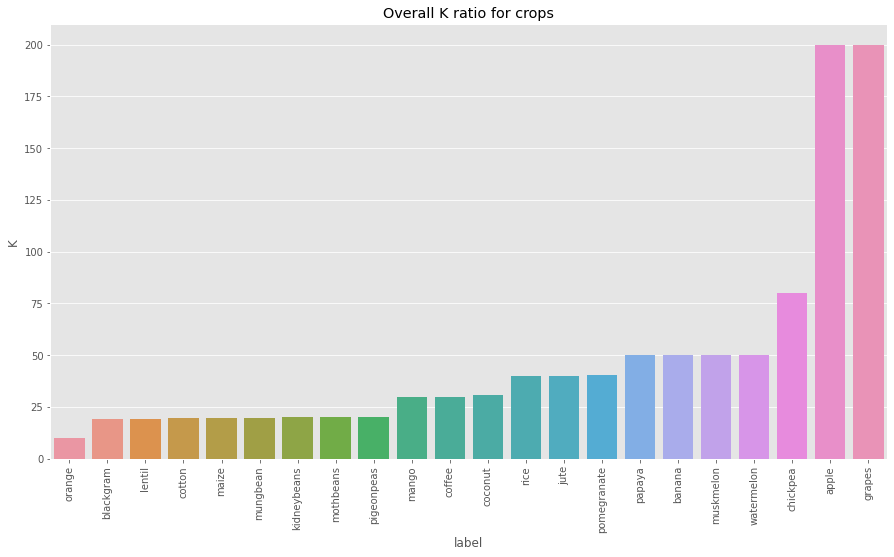

In [21]:
temp = data.groupby(by='label')['K'].mean().reset_index().sort_values('K')
# px.bar(temp, 'label', 'K' , title="Overall K ratio for crops")

plt.figure(figsize=((15,8)))
sns.barplot(data=temp,x="label" , y = "K" )
plt.title("Overall K ratio for crops")
plt.xticks(rotation = 90)
plt.show()

It is clear from above graphs that grapes and apples needs high P and K ratio in the soil

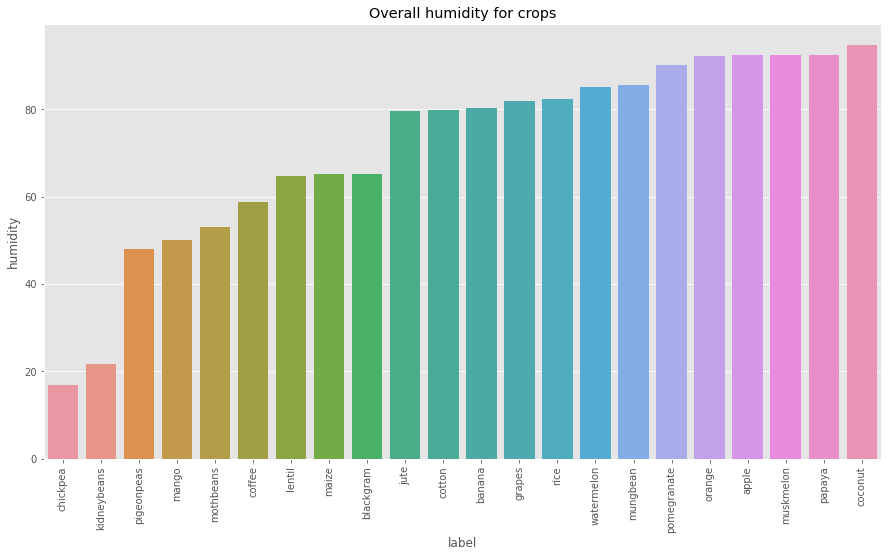

In [22]:
temp = data.groupby(by='label')['humidity'].mean().reset_index().sort_values('humidity')
# px.bar(temp, 'label', 'humidity' , title="Overall humidity for crops")

plt.figure(figsize=((15,8)))
sns.barplot(data=temp,x="label" , y = "humidity" )
plt.title("Overall humidity for crops")
plt.xticks(rotation = 90)
plt.show()

Chickpea and kidneybeans can be grown in comparatively low humid areas

### Pandas Profiling Report

In [23]:
report = pandas_profiling.ProfileReport(data)
report

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

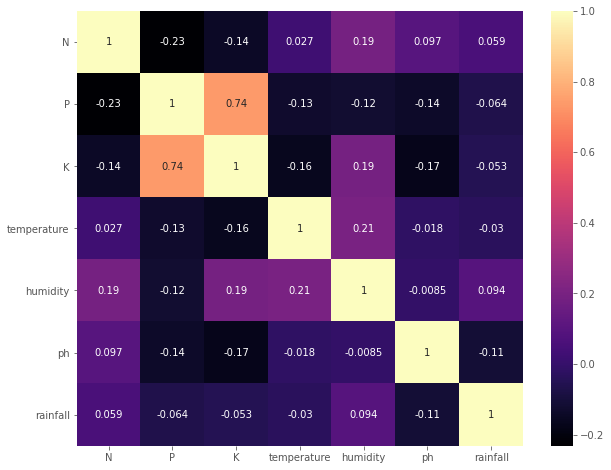

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr() , annot=True , cmap = "magma" )
plt.show()

P and K are a bit highly correlated rest all seems to be okay.

### Season Wise Crops

In [25]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(data[(data['temperature'] >= 30) & (data['humidity'] >= 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] <= 20) & (data['humidity'] >= 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] >= 200) & (data['humidity'] >= 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [26]:
X = data.drop('label',1)
# Saving this final data for reference during deployment
X.to_pickle('DataForML.pkl')


## Clustering similar crops

In [27]:
# Assigning x and y variables for model building
y = data['label'].values
X = data.drop('label',1).values

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

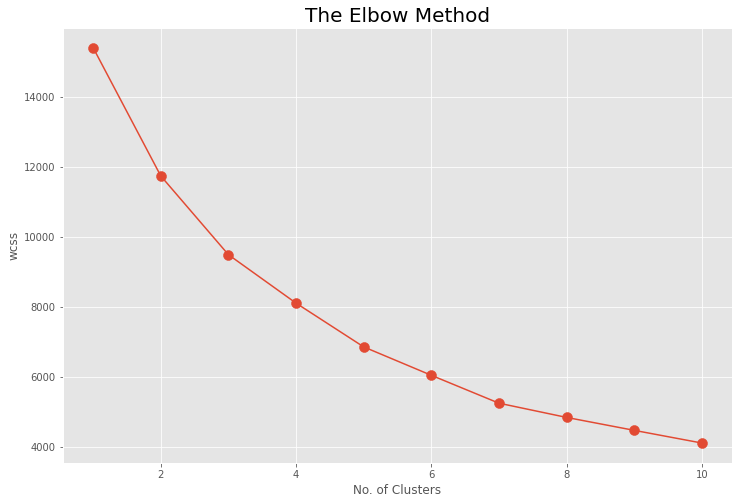

In [29]:
# lets determine the Optimum Number of Clusters within the Dataset

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km.fit(scaled_X)
    wcss.append(km.inertia_)

# lets plot the results
plt.figure(figsize=((12,8)))
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss ,s = 100)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [30]:
# lets implement the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++',  random_state = 0)
y_means = km.fit_predict(scaled_X)

# lets find out the Results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")

for i in range(0,4):

    print("Crops in Cluster "+str(i+1)+" :", z[z['cluster'] == i]['label'].unique())
    print("---------------------------------------------------------------")


Lets check the Results After Applying the K Means Clustering Analysis 

Crops in Cluster 1 : ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'mango']
---------------------------------------------------------------
Crops in Cluster 2 : ['grapes' 'apple']
---------------------------------------------------------------
Crops in Cluster 3 : ['maize' 'mungbean' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton'
 'jute' 'coffee']
---------------------------------------------------------------
Crops in Cluster 4 : ['rice' 'pigeonpeas' 'pomegranate' 'orange' 'papaya' 'coconut' 'jute'
 'coffee']
---------------------------------------------------------------


## Building Model

In [31]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.pipeline import Pipeline, make_pipeline

# Tuning
from sklearn.model_selection import GridSearchCV

# Feature Extraction
from sklearn.feature_selection import RFE

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True , stratify=y)

print("The Shape of X_train:", X_train.shape)
print("The Shape of X_test:", X_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)
print("\n\n---------------------------------------------------------------------------------\n\n")

models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('GaussianNB'   , GaussianNB()))
models.append(('SVM'  , SVC(random_state=0 ,probability=True)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
models.append(('XGBClassifier', XGBClassifier(random_state=0)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0)))


model_name = []
accuracy = []

for name, model in models: 
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print(name, metrics.accuracy_score(y_test,y_pred))
    
Accuracy_df = pd.DataFrame({"Model" : model_name , "Accuracy" : accuracy})
Accuracy_df

The Shape of X_train: (1474, 7)
The Shape of X_test: (726, 7)
The Shape of y_train: (1474,)
The Shape of y_test: (726,)


---------------------------------------------------------------------------------


LogisticRegression 0.9476584022038568
GaussianNB 0.9917355371900827
SVM 0.9752066115702479
DecisionTreeClassifier 0.977961432506887
[11:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.990358126721763
GradientBoostingClassifier 0.987603305785124
KNeighborsClassifier 0.9820936639118457
RandomForestClassifier 0.9917355371900827


,Model,Accuracy
0,LogisticRegression,0.947658
1,GaussianNB,0.991736
2,SVM,0.975207
3,DecisionTreeClassifier,0.977961
4,XGBClassifier,0.990358
5,GradientBoostingClassifier,0.987603
6,KNeighborsClassifier,0.982094
7,RandomForestClassifier,0.991736


In [32]:
unique, frequency = np.unique(y_train,  
                              return_counts = True) 
# print unique values array 
print("Unique Values:",  
      unique) 
  
# print frequency array 
print("Frequency Values:", 
      frequency)

Unique Values: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
Frequency Values: [67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67]


In [33]:
unique, frequency = np.unique(y_test,  
                              return_counts = True) 
# print unique values array 
print("Unique Values:",  
      unique) 
  
# print frequency array 
print("Frequency Values:", 
      frequency)

Unique Values: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
Frequency Values: [33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33]


                        Model  Accuracy
0          LogisticRegression  0.947658
2                         SVM  0.975207
3      DecisionTreeClassifier  0.977961
6        KNeighborsClassifier  0.982094
5  GradientBoostingClassifier  0.987603
4               XGBClassifier  0.990358
1                  GaussianNB  0.991736
7      RandomForestClassifier  0.991736


<BarContainer object of 8 artists>

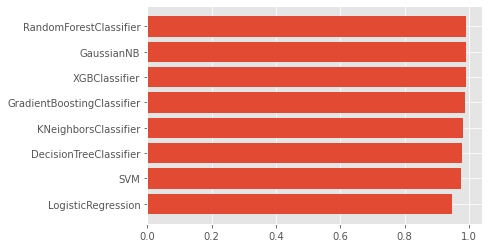

In [34]:
Temp = Accuracy_df.sort_values("Accuracy")
print(Temp)
plt.barh( Temp["Model"],Temp["Accuracy"] )
# px.bar(Temp, "Accuracy","Model" , title="Accuracy Comparison")

In [35]:

def NormalizedModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler == 'normalizer':
        scaler = Normalizer()
    elif nameOfScaler == 'binarizer':
        scaler = Binarizer()

    pipelines = []
    pipelines.append((nameOfScaler+'_LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'_KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'_DT'  , Pipeline([('Scaler', scaler),('DT'  , DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'_NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'_SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'_GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'_RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))

    return pipelines

# Train model
def fit_model(X_train, y_train,models):
    
    num_folds = 10
    scoring = 'accuracy'

    accuracy = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        accuracy.append(cv_results.mean())
        names.append(name)

    df = pd.DataFrame({"Model" : names , "Accuracy" :accuracy })
    print(df)
    return df


In [36]:
ScaledModel = NormalizedModel('standard')
df = fit_model(X_train, y_train, ScaledModel)


          Model  Accuracy
0   standard_LR  0.968110
1  standard_KNN  0.970142
2   standard_DT  0.986418
3   standard_NB  0.995252
4  standard_SVM  0.978286
5  standard_GBM  0.983062
6   standard_RF  0.994572


In [37]:
df

,Model,Accuracy
0,standard_LR,0.968110
1,standard_KNN,0.970142
2,standard_DT,0.986418
3,standard_NB,0.995252
4,standard_SVM,0.978286
5,standard_GBM,0.983062
6,standard_RF,0.994572


<BarContainer object of 7 artists>

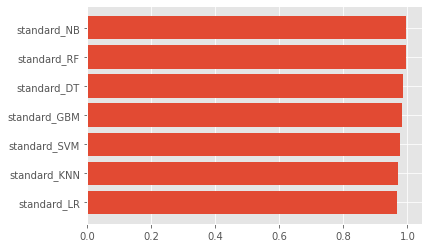

In [38]:
Temp = df.sort_values("Accuracy")
# px.bar(Temp, "Accuracy","Model" , title="Accuracy Comparison")
plt.barh( Temp["Model"],Temp["Accuracy"] )

In [39]:
ScaledModel = NormalizedModel('minmax')
df = fit_model(X_train, y_train, ScaledModel)

        Model  Accuracy
0   minmax_LR  0.922003
1  minmax_KNN  0.975575
2   minmax_DT  0.986422
3   minmax_NB  0.995252
4  minmax_SVM  0.978300
5  minmax_GBM  0.983062
6   minmax_RF  0.993220


<BarContainer object of 7 artists>

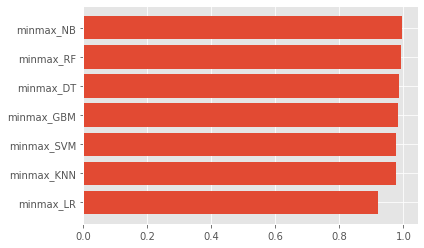

In [40]:
Temp = df.sort_values("Accuracy")
# px.bar(Temp, "Accuracy","Model" , title="Accuracy Comparison")
plt.barh( Temp["Model"],Temp["Accuracy"] )

In [41]:
# Metrics
from sklearn.metrics import classification_report

pipeline = make_pipeline(MinMaxScaler(),  GaussianNB())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    
print(classification_report(y_test, y_pred))

Training Accuracy Score: 99.6%
Validation Accuracy Score: 99.2%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        33
      banana       1.00      1.00      1.00        33
   blackgram       1.00      1.00      1.00        33
    chickpea       1.00      1.00      1.00        33
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        33
      cotton       0.97      1.00      0.99        33
      grapes       1.00      1.00      1.00        33
        jute       0.89      1.00      0.94        33
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      0.97      0.98        33
       maize       1.00      0.97      0.98        33
       mango       1.00      1.00      1.00        33
   mothbeans       0.97      1.00      0.99        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        33
      orange     

In [42]:
from sklearn.metrics import accuracy_score        
accuracy_score(y_test, y_pred)

0.9917355371900827

## Sample Data Prediction

In [43]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [44]:
N = 108
P = 34
K = 33
temperature = 27
humidity = 66
ph = 6.7
rainfall = 178


sample = [N, P, K, temperature, humidity, ph, rainfall]
single_sample = np.array(sample).reshape(1,-1)
pred = model.predict(single_sample)
pred.item()

'coffee'

## Retraining model with 100% data

In [45]:
# Training the model on 100% Data available
Final_GaussianNB_Model=model.fit(X,y)

## Saving Model as Serilized File

In [46]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_GaussianNB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_GaussianNB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\ASUS\Desktop\playground\Python\DS Handbook\CS\Workshop-Resources\Workshop Resources


## Create Python Function

In [55]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Appending the new data with the Training data
#     dataForML=pd.read_pickle('dataForML.pkl')
#     InputData=InputData.append(dataForML)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    
    import pickle
    with open('Final_GaussianNB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genprice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [67]:
data[0:3]

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [57]:
data.iloc[100]

N                     71
P                     54
K                     16
temperature      22.6136
humidity       63.690706
ph              5.749914
rainfall       87.759539
label              maize
Name: 100, dtype: object

In [70]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[90,42,43,21,82 , 6.5 , 205.369],
     [ 3,50,18,28,65 , 3.69 , 32.56] ,
     [ 71,54,16,23,10 , 5.75 , 87.76],
     [ 71,150,160,23,64 , 5.75 , 87.76]],
    
columns=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

    N    P    K  temperature  humidity    ph  rainfall
0  90   42   43           21        82  6.50   205.369
1   3   50   18           28        65  3.69    32.560
2  71   54   16           23        10  5.75    87.760
3  71  150  160           23        64  5.75    87.760


,Prediction
0,rice
1,mothbeans
2,pigeonpeas
3,grapes
